## 預測客戶是否流失

### 讀取資料

In [65]:
# Python for Data Analysis: Pandas
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/pydeeplearning/master/data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


### 資料預處理

In [3]:
df = df.iloc[:,3:]

In [5]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [9]:
def convertYesNo(ele):
    if ele == 'yes':
        return 1
    else:
        return 0
    
convertYesNo('no')

0

In [11]:
df['international_plan'] = df['international_plan'].map(convertYesNo)

In [ ]:
#df['international_plan'] = df['international_plan'].map(lambda ele: 1 if ele == 'yes' else 0)

In [12]:
df['voice_mail_plan'] = df['voice_mail_plan'].map(convertYesNo)

In [13]:
df['churn'] = df['churn'].map(convertYesNo)

In [14]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [15]:
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

In [18]:
#x

### 建立訓練與測試資料

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

In [20]:
x.shape

(3333, 16)

In [21]:
y.shape

(3333,)

In [22]:
x_train.shape

(2233, 16)

In [23]:
y_train.shape

(2233,)

In [24]:
x_test.shape

(1100, 16)

In [26]:
y_test.shape

(1100,)

### 數據標準化

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [63]:
?StandardScaler
#x_train
#x_test

### 使用Keras 建立 ANN

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

In [34]:
classifier = Sequential()
# Dense = X * W + b
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
history = classifier.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose =0,
                    validation_data=(x_test, y_test))

### 評估模型

In [52]:
from sklearn.metrics import accuracy_score
y_pred    = classifier.predict(x_test)
predicted = classifier.predict(x_test) > 0.5

accuracy_score(y_test, predicted)

0.8827272727272727

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[938,  12],
       [117,  33]], dtype=int64)

### 繪製ROC Curve

In [54]:
from sklearn.metrics import roc_curve
fpr_ary, tpr_ary, thresholds = roc_curve(y_test, y_pred)

Populating the interactive namespace from numpy and matplotlib


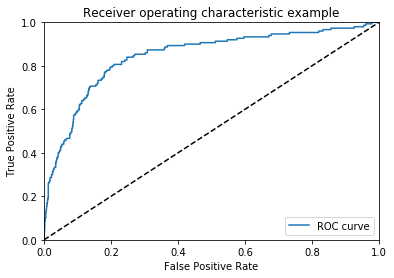

In [55]:
%pylab inline
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 建立不同學習模型

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(x_train, y_train)

clf2 = SVC(probability = True)
clf2.fit(x_train, y_train)

clf3 = LogisticRegression()
clf3.fit(x_train, y_train)

clf4 = RandomForestClassifier()
clf4.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### 使用ROC Curve 比較模型

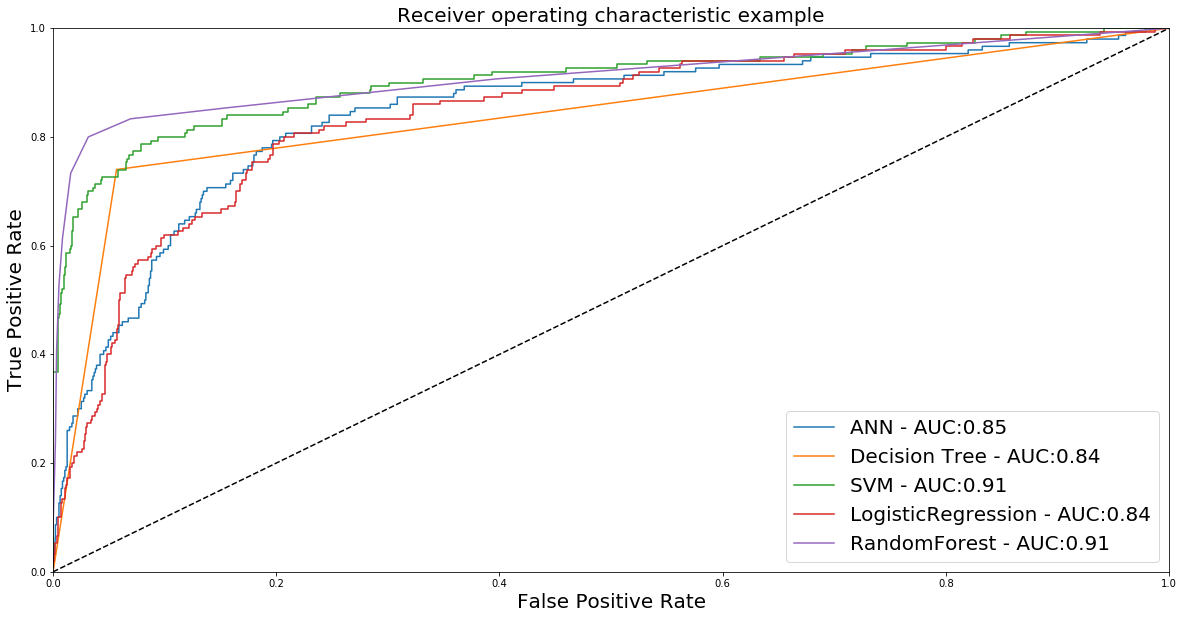

In [62]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])
for clf, title in zip([classifier,clf1,clf2,clf3, clf4], ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    if title != 'ANN':
        probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    else:
        y_pred = clf.predict(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

### ZIP

In [60]:
a = ['a', 'b', 'c']
b = [1  ,  2 ,   3]

for i in range(0, len(a)):
    print(a[i], b[i])

a 1
b 2
c 3


In [61]:
for i, j in zip(a,b):
    print(i,j)

a 1
b 2
c 3


### 取得模型權重

In [69]:
len(classifier.get_weights())

6

In [70]:
W = classifier.get_weights()

In [73]:
W[0].shape

(16, 8)

In [75]:
W[1].shape

(8,)

In [77]:
W[2].shape

(8, 8)

In [79]:
W[3].shape

(8,)

In [82]:
W[4].shape

(8, 1)

In [84]:
W[5].shape

(1,)

### 模型保存

#### Scikit Learn Model Persistence
- http://scikit-learn.org/stable/modules/model_persistence.html

In [91]:
## sklearn
from sklearn.externals import joblib
joblib.dump(clf1, 'decisionTree.pkl') 

['decisionTree.pkl']

In [92]:
clf_test = joblib.load('decisionTree.pkl') 

In [93]:
clf_test.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Keras Persist Model
- https://keras.io/getting-started/faq/

In [94]:
## keras
classifier.save('ann.pkl')

In [95]:
classifier_test = keras.models.load_model('ann.pkl')

In [90]:
classifier_test.predict(x_test)

array([[0.5704438 ],
       [0.15745814],
       [0.02516353],
       ...,
       [0.04971304],
       [0.01059475],
       [0.09091126]], dtype=float32)

## 使用ANN 辨識手寫數字

In [96]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense

In [97]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [98]:
x_train.shape

(60000, 28, 28)

In [99]:
x_test.shape

(10000, 28, 28)

In [100]:
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [102]:

n_classes   = 10 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [104]:

n_hidden_1  = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

In [105]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [106]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 46us/step - loss: 0.2415 - acc: 0.9301 - val_loss: 0.1111 - val_acc: 0.9654
Epoch 2/15
60000/60000 [==============================] - 2s 41us/step - loss: 0.0912 - acc: 0.9718 - val_loss: 0.1063 - val_acc: 0.9679
Epoch 3/15
60000/60000 [==============================] - 3s 42us/step - loss: 0.0614 - acc: 0.9805 - val_loss: 0.0712 - val_acc: 0.9782
Epoch 4/15
60000/60000 [==============================] - 2s 41us/step - loss: 0.0439 - acc: 0.9863 - val_loss: 0.0795 - val_acc: 0.9768
Epoch 5/15
60000/60000 [==============================] - 3s 42us/step - loss: 0.0320 - acc: 0.9897 - val_loss: 0.0772 - val_acc: 0.9773
Epoch 6/15
60000/60000 [==============================] - 2s 41us/step - loss: 0.0243 - acc: 0.9926 - val_loss: 0.0791 - val_acc: 0.9776
Epoch 7/15
60000/60000 [==============================] - 3s 42us/step - loss: 0.0214 - acc: 0.9928 - val_loss: 0.0645 - val_acc

### GIMP 
- https://www.gimp.org/downloads/

In [112]:
def relu_function(x):
    return np.maximum(0,x)

x = np.array([-1,1,2])
relu_function(x)


array([0, 1, 2])

## 使用CNN 辨識手寫數字

### 引用套件

In [113]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D

### 讀取MINIST 數據

In [114]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [115]:
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [116]:
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

### 設定網路參數

In [117]:
n_hidden_1 = 256 
n_classes  = 10 

training_epochs = 15
batch_size = 100

### 建立 CNN

In [118]:
model = keras.Sequential()

model.add(Conv2D(
            filters=16,
            kernel_size = (3,3),
            padding = 'same',
            input_shape = (28,28,1), 
            activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(n_hidden_1, activation='relu'))

model.add(Dense(n_classes, activation='softmax'))

In [119]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 訓練神經網路

In [120]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 23s 382us/step - loss: 0.2033 - acc: 0.9414 - val_loss: 0.0800 - val_acc: 0.9751
Epoch 2/15
60000/60000 [==============================] - 23s 378us/step - loss: 0.0678 - acc: 0.9801 - val_loss: 0.0605 - val_acc: 0.9806
Epoch 3/15
60000/60000 [==============================] - 22s 366us/step - loss: 0.0434 - acc: 0.9867 - val_loss: 0.0429 - val_acc: 0.9843
Epoch 4/15
60000/60000 [==============================] - 22s 366us/step - loss: 0.0307 - acc: 0.9907 - val_loss: 0.0434 - val_acc: 0.9854
Epoch 5/15
60000/60000 [==============================] - 22s 370us/step - loss: 0.0231 - acc: 0.9931 - val_loss: 0.0375 - val_acc: 0.9874
Epoch 6/15
60000/60000 [==============================] - 22s 370us/step - loss: 0.0157 - acc: 0.9951 - val_loss: 0.0510 - val_acc: 0.9832
Epoch 7/15
60000/60000 [==============================] - 22s 372us/step - loss: 0.0127 - acc: 0.9962 - val_loss: 0.

## MNIST Performance
- http://yann.lecun.com/exdb/mnist/

## 使用CNN 分類貓與狗

In [134]:

# Importing the Keras libraries and packages# Import 
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

In [135]:
# 1. Convolution  
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64,
3), activation = 'relu'))

In [136]:
# 2. Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [137]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [138]:
# 3. Flattening
classifier.add(Flatten())

In [139]:
# 4. Fully Connection
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [140]:
classifier.compile(optimizer = 'adam', loss =
'binary_crossentropy', metrics = ['accuracy'])

In [141]:
from keras.preprocessing.image import ImageDataGenerator

In [142]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

In [143]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [144]:
training_set = train_datagen.flow_from_directory(
    'dataset/training_set', target_size = (64, 64),
     batch_size = 32,
     class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [145]:
test_set = test_datagen.flow_from_directory(
    'dataset/test_set', target_size = (64, 64),
    batch_size = 32, 
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [146]:
classifier.fit_generator(training_set, steps_per_epoch = 8000,
epochs = 2, validation_data = test_set, validation_steps = 2000)

Epoch 1/2
8000/8000 [==============================] - 1660s 207ms/step - loss: 0.3480 - acc: 0.8368 - val_loss: 0.6702 - val_acc: 0.7886
Epoch 2/2
8000/8000 [==============================] - 1642s 205ms/step - loss: 0.0871 - acc: 0.9676 - val_loss: 0.8895 - val_acc: 0.8118


### 使用單張圖片做驗證

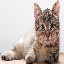

In [171]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size= (64,64))
test_image


In [172]:
test_image = image.img_to_array(test_image)

test_image

array([[[239., 239., 239.],
        [239., 239., 239.],
        [239., 239., 239.],
        ...,
        [245., 245., 245.],
        [245., 245., 245.],
        [245., 245., 245.]],

       [[239., 239., 239.],
        [239., 239., 239.],
        [239., 239., 239.],
        ...,
        [245., 245., 245.],
        [245., 245., 245.],
        [244., 244., 244.]],

       [[239., 239., 239.],
        [239., 239., 239.],
        [239., 239., 239.],
        ...,
        [244., 244., 244.],
        [244., 244., 244.],
        [244., 244., 244.]],

       ...,

       [[241., 217., 205.],
        [243., 220., 206.],
        [241., 219., 205.],
        ...,
        [227., 200., 181.],
        [233., 205., 191.],
        [232., 215., 197.]],

       [[255., 237., 227.],
        [251., 234., 227.],
        [252., 235., 227.],
        ...,
        [219., 193., 178.],
        [219., 193., 180.],
        [216., 189., 172.]],

       [[243., 230., 222.],
        [250., 235., 228.],
        [246., 2

In [173]:
type(test_image)

numpy.ndarray

In [174]:
test_image.shape

(64, 64, 3)

In [175]:
test_image = np.expand_dims(test_image, axis = 0)

In [176]:
a = np.array([[1,2,3],[4,5,6]])
a.shape

np.expand_dims(a, axis = 0)

array([[[1, 2, 3],
        [4, 5, 6]]])

In [177]:
test_image.shape

(1, 64, 64, 3)

In [178]:
result = classifier.predict_classes(test_image)

In [179]:
result

array([[0]])

##  撰寫網路爬蟲抓取圖片

In [182]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.google.com.tw/search?ei=WchSW_n6H4Gg-Qb815eQBA&yv=3&q=%E6%9E%97%E5%BF%97%E7%8E%B2&tbm=isch&vet=10ahUKEwi5i-DMvq_cAhUBUN4KHfzrBUIQuT0IuAEoAQ.WchSW_n6H4Gg-Qb815eQBA.i&ved=0ahUKEwi5i-DMvq_cAhUBUN4KHfzrBUIQuT0IuAEoAQ&ijn=3&start=300&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc')
soup = BeautifulSoup(res.text, 'lxml')

In [187]:
#res.text

In [191]:
import json
images = []
for rec in soup.select('.rg_meta'):
    jd = json.loads(rec.text)
    #print(jd.get('tu'))
    images.append(jd.get('tu'))

In [192]:
len(images)

100

In [190]:
with open('1.jpg', 'wb') as f:
    res2 = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS_BppwhgbGNxrTGXCBkUiguCyuwKJG4OYKunRhn37t-P_Drk3Q')
    f.write(res2.content)

In [196]:
google_url = 'https://www.google.com.tw/search?ei=WchSW_n6H4Gg-Qb815eQBA&yv=3&q={}&tbm=isch&vet=10ahUKEwi5i-DMvq_cAhUBUN4KHfzrBUIQuT0IuAEoAQ.WchSW_n6H4Gg-Qb815eQBA.i&ved=0ahUKEwi5i-DMvq_cAhUBUN4KHfzrBUIQuT0IuAEoAQ&ijn=3&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'
google_url.format('周子瑜', 100)
res = requests.get(google_url.format('周子瑜', 0))
soup = BeautifulSoup(res.text, 'lxml')

In [198]:
import json
images = []
for rec in soup.select('.rg_meta'):
    jd = json.loads(rec.text)
    #print(jd.get('tu'))
    images.append(jd.get('tu'))

In [199]:
import json, requests
from bs4 import BeautifulSoup
google_url = 'https://www.google.com.tw/search?ei=WchSW_n6H4Gg-Qb815eQBA&yv=3&q={}&tbm=isch&vet=10ahUKEwi5i-DMvq_cAhUBUN4KHfzrBUIQuT0IuAEoAQ.WchSW_n6H4Gg-Qb815eQBA.i&ved=0ahUKEwi5i-DMvq_cAhUBUN4KHfzrBUIQuT0IuAEoAQ&ijn=3&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'


def getIdolImage(keywords, dest_dir, batch):
    for i in range(batch):
        res = requests.get(google_url.format(keywords, i* 100))
        soup = BeautifulSoup(res.text, 'lxml')  

        for rec in soup.select('.rg_meta'):
            jd = json.loads(rec.text)
            url = jd.get('tu')
            with open(dest_dir + url.split('tbn:')[1] + '.jpg', 'wb') as f:
                res2 = requests.get(url)
                f.write(res2.content)

In [ ]:
import os
os.mkdir('idol1/')

In [201]:
getIdolImage('周子瑜', 'idol1/', 3)

In [202]:
import os
os.mkdir('idol2/')

In [203]:
getIdolImage('郭雪芙', 'idol2/', 3)

In [204]:
import os
os.mkdir('idol3/')

In [205]:
getIdolImage('林志玲', 'idol3/', 3)

## 使用OpenCV 擷取人臉

### 安裝OpenCV

In [207]:
! pip install opencv-python

distributed 1.21.8 requires msgpack, which is not installed.


### 使用OpenCV 擷取人臉

In [210]:
import cv2 as cv

In [211]:
os.listdir('idol1/')

['ANd9GcQ-ZfgQG3rfHKmzpCGx2tegEwwJOYFy-rMvoh1Bi3QHhLUsoeY_.jpg',
 'ANd9GcQ0wqdSb8yIfi-bX1pHL2RK0cjlMs_2RxSNX3EvMCFj1Cf-JMzJ.jpg',
 'ANd9GcQ1G77V4RLE0jwY5cmuHzAQJwFxf5kmZliOX79RY3xtfWkTkvvmLQ.jpg',
 'ANd9GcQ1secSGENOmrD3YHKnOu9asasIh0vLD41Q8oUDXThKxBN1saQz7g.jpg',
 'ANd9GcQ33AqAXoKPPphbK2ykukECp-GDfl8GIwu9k9UG4Q9dyuh3U9pL.jpg',
 'ANd9GcQ3LybDYVOxxKCI-tREw3h5HXlvBouArzBOITEmH7WLqe5ehwYosw.jpg',
 'ANd9GcQ3qKbTEQDnozLVX-JYYpc6cZjz4GnFbdglVs_vzbCObCHXT_EIrw.jpg',
 'ANd9GcQ56ORyeifrR6Ic8vNKKZ-VJPcfaNXXQJNS0IMvy43BfdHLGM6M.jpg',
 'ANd9GcQ5RCSS7IYE2aInlOCfS-Lkna01-yUFWJ4HY4MWyitb6q2fXTf3CA.jpg',
 'ANd9GcQ79xBdKtn4q7zw-Ou3NACB_eJq7cDZgTD6k9zYT8sH7UGz4HxtZg.jpg',
 'ANd9GcQ8JuzI3MiYOYjzPxZQKEUVIlI8tyx1l8pK3x8E6KNqCljZoA8c.jpg',
 'ANd9GcQ9FYc3BCnqkeniQC98exF1af-B1omLt2y4EShr7jcUgT-J9Ptovw.jpg',
 'ANd9GcQaogybPHCXUuLEo3zsw9LRcp02-F_9ww5WzEUpF-7lmH9KVd4i.jpg',
 'ANd9GcQaSoOinm8bTFh5jCxk-zCgey2VzhUHkoJ_qDiWzVZLbYNHWaeA.jpg',
 'ANd9GcQbb320FgE7bVIryXGPLvV4BlVhhfr0HWXkHSssF9kti-eKqe2Y.jpg',
 'ANd9GcQBg

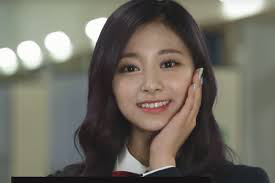

In [223]:
from PIL import Image
Image.open('idol1/ANd9GcQ0wqdSb8yIfi-bX1pHL2RK0cjlMs_2RxSNX3EvMCFj1Cf-JMzJ.jpg')

### 偵測人臉

In [224]:
import cv2 as cv
img = cv.imread('idol1/ANd9GcQ0wqdSb8yIfi-bX1pHL2RK0cjlMs_2RxSNX3EvMCFj1Cf-JMzJ.jpg')

In [225]:
face_cascade = cv.CascadeClassifier('C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img, 1.3, 5)

In [222]:
?face_cascade.detectMultiScale(img, 1.3, 5)

In [226]:
faces

array([[104,  26, 102, 102]], dtype=int32)

In [228]:
x,y,w,h = faces[0]

In [229]:
im = Image.open('idol1/ANd9GcQ0wqdSb8yIfi-bX1pHL2RK0cjlMs_2RxSNX3EvMCFj1Cf-JMzJ.jpg')

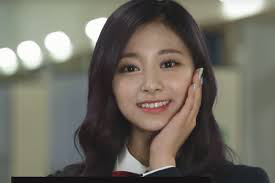

In [231]:
im

### 摘取人臉部分

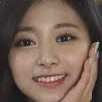

In [232]:
im.crop((x,y,x + w, y+h))

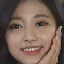

In [234]:
im.crop((x,y,x + w, y+h)).resize((64,64))

### 批次摘取人臉

In [235]:
import os
os.mkdir('idol1_face/')

In [240]:
src_path = 'idol1/'
dest_path = 'idol1_face/'
face_cascade = cv.CascadeClassifier('C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')

for f in os.listdir(src_path):
    img   = cv.imread(src_path + f)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    if len(faces) == 1:
        x , y, w, h = faces[0]
        im = Image.open(src_path + f)
        im = im.crop((x,y,x + w, y+h)).resize((64,64))
        im.save(dest_path+f)
        

### CropFace 函數

In [241]:
def cropFace(src_path, dest_path):
    face_cascade = cv.CascadeClassifier('C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')

    for f in os.listdir(src_path):
        img   = cv.imread(src_path + f)
        faces = face_cascade.detectMultiScale(img, 1.3, 5)
        if len(faces) == 1:
            x , y, w, h = faces[0]
            im = Image.open(src_path + f)
            im = im.crop((x,y,x + w, y+h)).resize((64,64))
            im.save(dest_path+f) 

In [242]:
os.mkdir('idol2_face/')
cropFace('idol2/', 'idol2_face/')

In [243]:
os.mkdir('idol3_face/')
cropFace('idol3/', 'idol3_face/')

## 建立CNN 辨識明星臉孔

In [244]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()
# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64,
3), activation = 'relu'))
# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dense(units = 3, activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

In [245]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                                   horizontal_flip = True #水平翻转操作
                                  )

In [246]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [247]:
training_set = train_datagen.flow_from_directory(
    'trainset/', target_size = (64, 64),
     batch_size = 30,
     class_mode = 'categorical')

Found 437 images belonging to 3 classes.


In [248]:
test_set = test_datagen.flow_from_directory(
    'testset/', target_size = (64, 64),
    batch_size = 30, 
    class_mode = 'categorical')

Found 99 images belonging to 3 classes.


In [249]:
history = classifier.fit_generator(training_set,
                         epochs = 100,
                         verbose = 1, 
                         validation_data = test_set)

Epoch 1/100
15/15 [==============================] - 3s 209ms/step - loss: 1.1458 - acc: 0.3830 - val_loss: 1.0907 - val_acc: 0.3333
Epoch 2/100
15/15 [==============================] - 2s 129ms/step - loss: 1.0756 - acc: 0.4202 - val_loss: 1.0798 - val_acc: 0.4343
Epoch 3/100
15/15 [==============================] - 2s 130ms/step - loss: 1.0381 - acc: 0.4863 - val_loss: 1.0436 - val_acc: 0.4444
Epoch 4/100
15/15 [==============================] - 2s 133ms/step - loss: 0.9872 - acc: 0.5382 - val_loss: 0.9783 - val_acc: 0.5758
Epoch 5/100
15/15 [==============================] - 2s 132ms/step - loss: 0.9138 - acc: 0.5980 - val_loss: 0.9745 - val_acc: 0.5354
Epoch 6/100
15/15 [==============================] - 2s 134ms/step - loss: 0.8675 - acc: 0.6075 - val_loss: 0.9965 - val_acc: 0.5051
Epoch 7/100
15/15 [==============================] - 2s 134ms/step - loss: 0.8169 - acc: 0.6454 - val_loss: 0.8280 - val_acc: 0.6061
Epoch 8/100
15/15 [==============================] - 2s 133ms/step - 

15/15 [==============================] - 2s 134ms/step - loss: 0.1604 - acc: 0.9427 - val_loss: 0.7720 - val_acc: 0.7980
Epoch 63/100
15/15 [==============================] - 2s 132ms/step - loss: 0.2239 - acc: 0.9106 - val_loss: 0.5560 - val_acc: 0.8384
Epoch 64/100
15/15 [==============================] - 2s 133ms/step - loss: 0.1334 - acc: 0.9577 - val_loss: 0.5879 - val_acc: 0.8182
Epoch 65/100
15/15 [==============================] - 2s 133ms/step - loss: 0.1616 - acc: 0.9361 - val_loss: 0.7319 - val_acc: 0.7879
Epoch 66/100
15/15 [==============================] - 2s 134ms/step - loss: 0.1267 - acc: 0.9577 - val_loss: 0.7243 - val_acc: 0.8081
Epoch 67/100
15/15 [==============================] - 2s 133ms/step - loss: 0.1157 - acc: 0.9666 - val_loss: 0.6975 - val_acc: 0.7980
Epoch 68/100
15/15 [==============================] - 2s 133ms/step - loss: 0.1487 - acc: 0.9466 - val_loss: 0.8432 - val_acc: 0.7980
Epoch 69/100
15/15 [==============================] - 2s 132ms/step - loss:

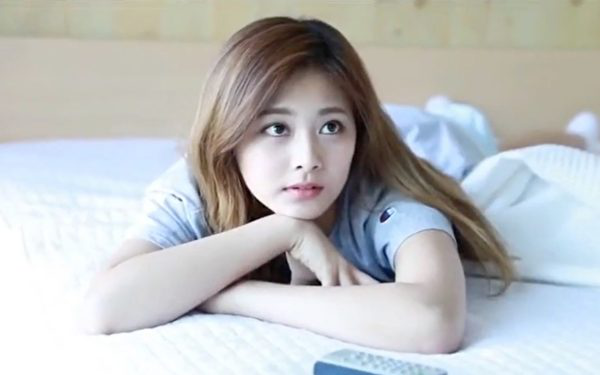

In [250]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
face_cascade = cv.CascadeClassifier('C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
from PIL import Image

img = cv.imread('i1.jpg')
faces = face_cascade.detectMultiScale(img, 1.3, 5)
im = Image.open('i1.jpg')
im

In [251]:
x,y,w,h = faces[0]
box = (x, y, x+w, y+h)
crpim = im.crop(box).resize((64,64))
crpim.save('i1_d.jpg')

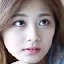

In [252]:
crpim

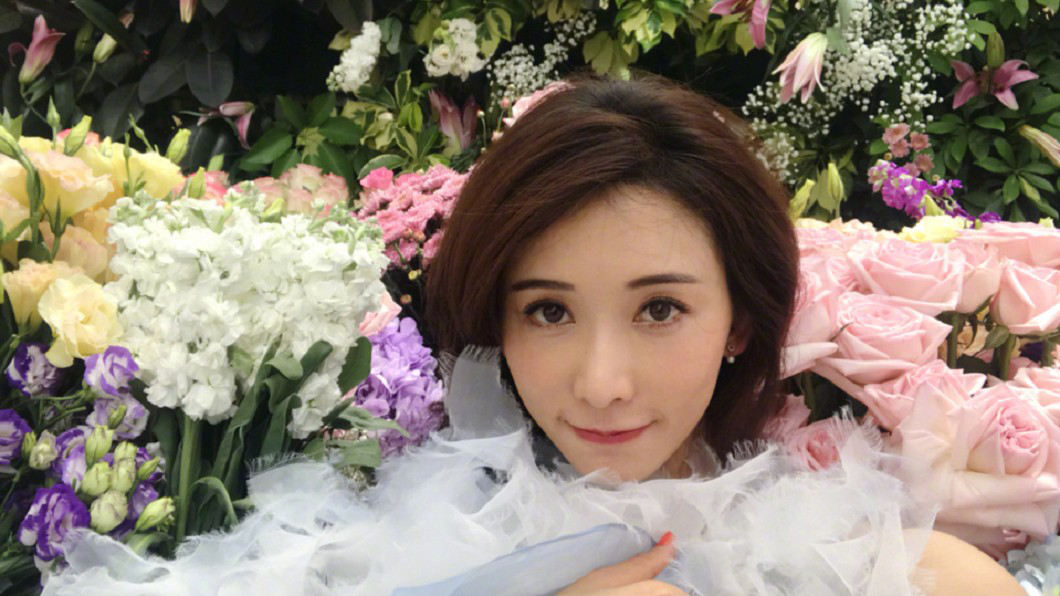

In [253]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
face_cascade = cv.CascadeClassifier('C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
from PIL import Image

img = cv.imread('i2.jpg')
faces = face_cascade.detectMultiScale(img, 1.3, 5)
im = Image.open('i2.jpg')
im

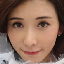

In [254]:
x,y,w,h = faces[0]
box = (x, y, x+w, y+h)
crpim = im.crop(box).resize((64,64))
crpim.save('i2_d.jpg')
crpim

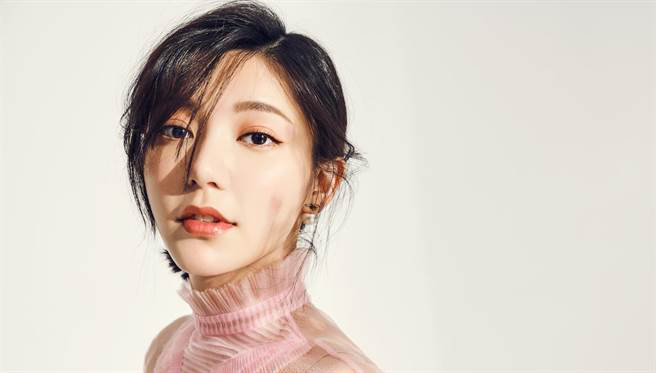

In [255]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
face_cascade = cv.CascadeClassifier('C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
from PIL import Image

img = cv.imread('i3.jpg')
faces = face_cascade.detectMultiScale(img, 1.3, 5)
im = Image.open('i3.jpg')
im

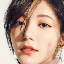

In [256]:
x,y,w,h = faces[0]
box = (x, y, x+w, y+h)
crpim = im.crop(box).resize((64,64))
crpim.save('i3_d.jpg')
crpim

In [262]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('predictions/i3_d.jpg', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
type(test_image)
test_image.shape
classifier.predict_classes(test_image)

array([1], dtype=int64)

In [263]:
classifier.save('idol.pkl')

In [264]:
cf2 = keras.models.load_model('idol.pkl')

## OpenCV
- https://opencv.org/

## Pretrained Model
- https://keras.io/applications/

## OpenFace
- https://cmusatyalab.github.io/openface/

## Facial Emotion
- https://sefiks.com/2018/01/01/facial-expression-recognition-with-keras/
- https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

In [280]:
import requests
payload = {
  'url': 'https://cdn2.ettoday.net/images/3117/d3117904.jpg'  
}
res = requests.post('http://127.0.0.1:5000/detect/', data = payload)
res.text

'{"data":"2"}\n'

## 股價預測

In [288]:
import pandas
dataset_train = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/%5ETWII.csv')

In [289]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-07-22,8092.029785,8137.370117,8092.029785,8105.450195,8105.419434,1948400.0
1,2013-07-23,8152.720215,8220.889648,8145.089844,8214.650391,8214.618164,2607200.0
2,2013-07-24,8222.849609,8233.099609,8172.229980,8196.190430,8196.158203,2210200.0
3,2013-07-25,8173.189941,8203.490234,8140.410156,8163.580078,8163.549316,2044600.0
4,2013-07-26,8188.359863,8222.820313,8135.729980,8149.399902,8149.369141,1833800.0


Populating the interactive namespace from numpy and matplotlib


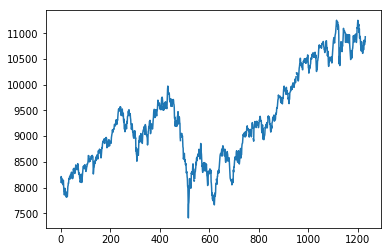

In [290]:
%pylab inline
dataset_train['Close'].plot(kind = 'line')

In [309]:
#dataset_train[~ dataset_train['Close'].isna()]

In [310]:
training_set = dataset_train[~ dataset_train['Close'].isna()].iloc[:, 4:5].values

In [311]:
training_set

array([[ 8105.450195],
       [ 8214.650391],
       [ 8196.19043 ],
       ...,
       [10842.459961],
       [10835.379883],
       [10932.110352]])

In [312]:
len(training_set)

1222

In [313]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [314]:
len(training_set)

1222

In [315]:
import numpy as np
X_train = []
y_train = []
for i in range(60, len(training_set)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [317]:
X_train.shape

(1162, 60)

In [318]:
y_train.shape

(1162,)

In [319]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [321]:
X_train.shape

(1162, 60, 1)

In [322]:
# Importing the Keras libraries and packages
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [323]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1162/1162 [==============================] - 7s 6ms/step - loss: 0.0574
Epoch 2/100
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0084
Epoch 3/100
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0063
Epoch 4/100
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0062
Epoch 5/100
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0060
Epoch 6/100
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0059
Epoch 7/100
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0059
Epoch 8/100
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0058
Epoch 9/100
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0054
Epoch 10/100
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0056
Epoch 11/100
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0058
Epoch 12/100
1162/1162 [==============================] - 3s 3ms/step - lo

1162/1162 [==============================] - 3s 3ms/step - loss: 0.0016
Epoch 98/100
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0015
Epoch 99/100
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0016
Epoch 100/100
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0015


In [325]:
predicted = regressor.predict(X_train)

In [326]:
predicted_stock_price = sc.inverse_transform(predicted)
real_stock_price = training_set

In [329]:
#predicted_stock_price

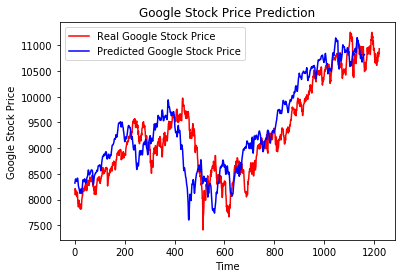

In [330]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()